        location  month  case_fatality_rate  total_cases  new_cases  \
312  Afghanistan      1            0.042522      51526.0        0.0   
313  Afghanistan      1            0.042522      51526.0        0.0   
314  Afghanistan      1            0.042522      51526.0        0.0   
315  Afghanistan      1            0.042199      53011.0     1485.0   
316  Afghanistan      1            0.042256      53105.0       94.0   

     total_deaths  new_deaths  
312        2191.0         0.0  
313        2191.0         0.0  
314        2191.0         0.0  
315        2237.0        46.0  
316        2244.0         7.0  


ValueError: Format 'json' is not supported (supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz)

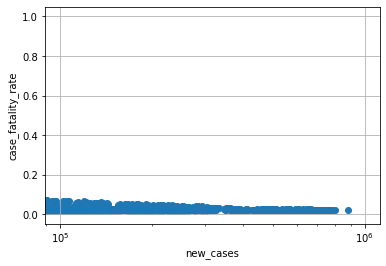

In [17]:
###Part A - Task1

import pandas as pd

import sys

covid = pd.read_csv("owid-covid-data.csv", encoding = "UTF8")

covid = covid[["location", "date", "total_cases", "new_cases", "total_deaths", "new_deaths"]]

covid[covid["date"].str[:4] == "2020"]

#change datetime to integer month  
covid["date"] = covid["date"].map(lambda x: int(x[5:7]))


covid.insert(2, "month", covid["date"])

#delete the date column
del covid["date"]

covid["case_fatality_rate"] = (covid["total_deaths"])/(covid["total_cases"])

#print the DataFrame sorted by location & month
covid = covid[["location", "month", "case_fatality_rate", "total_cases", "new_cases", "total_deaths", "new_deaths"]].sort_values(by = ["location", "month"])

print(covid.head(5))

covid.to_csv(sys.argv[1])

###Part A - Task2

import matplotlib.pyplot as plt

#x-axis for new_cases & y-axis for case_fatality_rate
plt.scatter(covid["new_cases"], covid["case_fatality_rate"])

plt.ylabel("case_fatality_rate")
plt.xlabel("new_cases")
plt.grid(True)
plt.savefig(sys.argv[1])

plt.xscale("log")
plt.savefig(sys.argv[2])



